## **Week 5: Inferential Statistics**

### **Objective**: 
Dive deep into inferential statistics and understand its relevance in drawing conclusions from data. Apply statistical tests to derive insights and make decisions based on data samples.

### **Instructions**:

You will have to choose either one dataset, or a couple different datasets to conduct a chi-square test, t-test, ANOVA, and regression. You will also have to provide insights on the results of each test. The scripts can be either in a notebook or a python script. You can use python or R, or BOTH! Suggest you do both if you want to maximize your learning.


In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#### **1. Chi-Square Test:**
1. Null Hypothesis (H0): There is no association between Shortness of Breath and Covid Status
2. Alternative Hypothesis (H1): There is an association between Shortness of Breath and Covid Status


In [3]:
df1 = pd.read_csv(r"C:\Users\Xavier\Downloads\archive\corona.csv")
df1

C:\Users\Xavier\AppData\Local\Temp\ipykernel_26860\3010723710.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\Xavier\Downloads\archive\corona.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [6]:
df1.columns = df1.columns.str.lower()
df1.columns

Index(['ind_id', 'test_date', 'cough_symptoms', 'fever', 'sore_throat',
       'shortness_of_breath', 'headache', 'corona', 'age_60_above', 'sex',
       'known_contact'],
      dtype='object')

In [7]:
df1['cough_symptoms'] = df1['cough_symptoms'].str.lower()
df1['shortness_of_breath'] = df1['shortness_of_breath'].str.lower()

In [79]:
df1['shortness_of_breath'].value_counts()

false    64428
true      1107
none         1
Name: shortness_of_breath, dtype: int64

In [10]:
df1['corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: corona, dtype: int64

In [77]:
sob = pd.crosstab(df1['shortness_of_breath'],df1['corona'])
print(sob)

corona               negative  other  positive
shortness_of_breath                           
false                   58464   1044      4920
none                        0      0         1
true                      340     23       744


In [78]:
chi2, p, dof, expected = chi2_contingency(sob)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Counts: {expected}")

Chi2 value: 4917.075119996579
P-value: 0.0
Degrees of Freedom: 4
Expected Counts: [[5.78098162e+04 1.04896051e+03 5.56922333e+03]
 [8.97277832e-01 1.62811279e-02 8.64410400e-02]
 [9.93286560e+02 1.80232086e+01 9.56902313e+01]]


The P value from this Chi test is 0.0. I am not sure if this is an error due to my input or not but because this value is less than 5% we can assume that there is not a significant relationship between shortness of breath and covid status. 



#### **2. T-Test:**
1. Null Hypothesis (H0): There is no difference in Heart Failure Prevelance between Northern and Southern States
2. Alternative Hypothesis (H1): There is a difference in Heart Failure Prevelance between Northern and Southern States


In [13]:
df2 = pd.read_csv("https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/cms-chronic-conditions/CC_R20_P08_v10_D18_WWDSE_Cond_complete.csv")
df2 = df2.dropna()
df2.sample(5)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
417,State,Maryland,24.0,All,All,All,Autism Spectrum Disorders,0.0024,7966.0182,10164.1917,0.2305,1295.7435,southern
715,State,North Dakota,38.0,All,All,All,Hepatitis (Chronic Viral B & C),0.0031,22581.7393,23225.9698,0.2821,2274.8344,non-southern
340,State,Kansas,20.0,All,All,All,Drug/Substance Abuse,0.0251,24473.9292,24058.2648,0.2615,2752.5538,non-southern
499,State,Mississippi,28.0,All,All,All,Asthma,0.0412,22671.8130,21259.1114,0.2106,1955.8132,southern
47,State,Arizona,4.0,All,All,All,Cancer,0.0874,18480.3587,19324.4684,0.1809,907.2663,non-southern


In [14]:
print(df2['Bene_Cond'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                                     Alcohol Abuse
1                      Alzheimer's Disease/Dementia
2                                         Arthritis
3                                            Asthma
4                               Atrial Fibrillation
                           ...                     
1046                                   Hypertension
1047                         Ischemic Heart Disease
1048                                   Osteoporosis
1049    Schizophrenia and Other Psychotic Disorders
1050                                         Stroke
Name: Bene_Cond, Length: 1051, dtype: object>


In [15]:
heartfailure = df2[df2['Bene_Cond'] == 'Heart Failure']

heartfailure = heartfailure[['Bene_Cond','Prvlnc','Hosp_Readmsn_Rate', 'is_southern']]

heartfailure.sample(10)



,Bene_Cond,Prvlnc,Hosp_Readmsn_Rate,is_southern
425,Heart Failure,0.1257,0.2643,southern
549,Heart Failure,0.1031,0.2042,non-southern
137,Heart Failure,0.1452,0.2490,non-southern
384,Heart Failure,0.1594,0.2458,southern
1003,Heart Failure,0.1511,0.2619,southern
570,Heart Failure,0.1298,0.2140,non-southern
961,Heart Failure,0.1280,0.2400,southern
239,Heart Failure,0.1013,0.2024,non-southern
1024,Heart Failure,0.1269,0.2244,non-southern
488,Heart Failure,0.1197,0.2427,non-southern


In [16]:
north = heartfailure[heartfailure['is_southern']== 'non-southern']['Prvlnc']
south = heartfailure[heartfailure['is_southern']== 'southern']['Prvlnc']

32      0.0964
53      0.1033
95      0.1391
116     0.1028
137     0.1452
239     0.1013
258     0.1121
279     0.1535
300     0.1511
321     0.1299
342     0.1352
404     0.1211
446     0.1276
467     0.1596
488     0.1197
530     0.1460
549     0.1031
570     0.1298
591     0.1199
611     0.1084
632     0.1519
653     0.1080
674     0.1501
714     0.1400
735     0.1474
777     0.1147
798     0.1336
818     0.1251
859     0.1210
920     0.1187
940     0.0938
982     0.1184
1024    0.1269
1043    0.1090
Name: Prvlnc, dtype: float64

In [85]:
northavg = north.mean()
southavg = south.mean()
print('Average prevelance for northern states is ', northavg)
print('Average prevelance for southern states is ',southavg)

Average prevelance for northern states is  0.1254029411764706
Average prevelance for southern states is  0.14454705882352942


In [86]:
t_stat, p_val = ttest_ind(south, north, equal_var = False)
print("T statistic is ",t_stat)
print('P value is', p_val)

T statistic is  4.017522776690597
P value is 0.00025989792313205196


The T statistic indicates that the heart failure prevalence is higher in southern states. The p value is less than 0.05 which indicates that there is significane between the heart failure prevelance of northern and southern states and there is strong evidence against the null hypothesis. 

#### **3. ANOVA:**

Null Hypothesis (H0): There is no difference in chest pain based on resting blood pressure.
Alternative Hypothesis (H1): There is a difference in chest pain based on resting blood pressure.

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df3 = pd.read_csv(r"C:\Users\Xavier\Downloads\archive\heart.csv")
df3.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [45]:
df3 = df3[['cp','restecg', 'trtbps']]
df3.rename(columns={'cp': 'chest_pain', 'restecg': 'resting_ecg', 'trtbps': 'resting_bp'}, inplace=True)
df3

,chest_pain,resting_ecg,resting_bp
0,3,0,145
1,2,1,130
2,1,0,130
3,1,1,120
4,0,1,120
...,...,...,...
298,0,1,140
299,3,1,110
300,0,1,144
301,0,1,130


This subset of data shows the level of chest pain from 0-3 and the resting blood pressure for individuals in a Heart Attack Analysis & Prediction study. 


In [47]:
model = ols('resting_bp ~ C(chest_pain)', data=df3).fit()

In [48]:
anova_table = sm.stats.anova_lm(model, typ =2)

print(anova_table)

                     sum_sq     df         F    PR(>F)
C(chest_pain)   2643.080394    3.0  2.918923  0.034397
Residual       90248.028517  299.0       NaN       NaN


In [49]:
df3.groupby('chest_pain')['resting_bp'].mean()

chest_pain
0    132.020979
1    128.400000
2    130.379310
3    140.869565
Name: resting_bp, dtype: float64

The P value for the Anova test was 0.0343 or 3.43% which indicated that there is siginficane behind the idea that resting blood pressure levels is associated with higher levels of chest pain. 

#### **4. Regression Analysis:**

Null Hypothesis (H0): There is not a  significant linear relationship between BMI and Glucose Levels
Alternative Hypothesis (H1): There is a significant linear relationship between BMI and Glucose Levels

In [54]:
df4 = pd.read_csv(r"C:\Users\Xavier\Downloads\archive\health care diabetes.csv")
df4.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
585,1,93,56,11,0,22.5,0.417,22,0
66,0,109,88,30,0,32.5,0.855,38,1
493,4,125,70,18,122,28.9,1.144,45,1
190,3,111,62,0,0,22.6,0.142,21,0
510,12,84,72,31,0,29.7,0.297,46,1


In [57]:
df4 = df4[['Glucose', 'BMI']]
df4.dropna()

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


In [62]:
x = df4['BMI']
y = df4['Glucose']

In [63]:
x = sm.add_constant(x)

In [67]:
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     39.36
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.89e-10
Time:                        22:28:34   Log-Likelihood:                -3731.0
No. Observations:                 768   AIC:                             7466.
Df Residuals:                     766   BIC:                             7475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.2129      4.708     19.585      0.0

In [66]:
import matplotlib.pyplot as plt

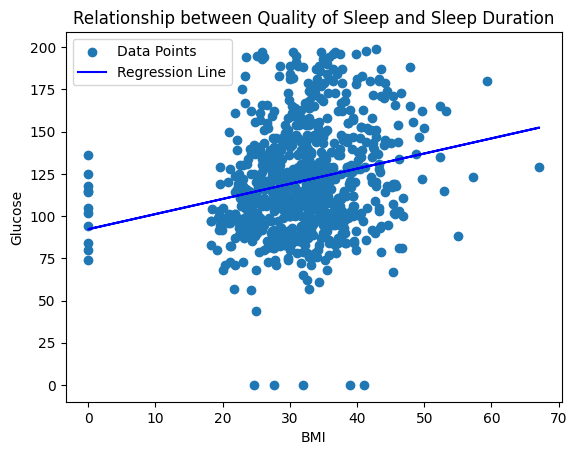

In [68]:
plt.scatter(df4['BMI'], df4['Glucose'], label='Data Points')
plt.plot(df4['BMI'], model.predict(x), color='blue', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Relationship between Quality of Sleep and Sleep Duration')
plt.legend()
plt.show()

The R squared value of 0.049 indicates that 49% of the variance in the Glucose Levels can be attributed to BMI, although the majority of variance, 51%, is still unexplained.